# ANALISIS EXPLORATORIO DE DATOS

### IMPORTAR LIBRERIAS

In [ ]:
# librerías utilizadas para el analisis del proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### CARGA DEL DATASET

Información del area de Ventas
 -- importación de los datos

In [ ]:
# Lectura de los datos desde el drive de google, archivo excel
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

ruta = "/gdrive/MyDrive/dataset/VentasRango.xlsx"
df_data = pd.read_excel(ruta)

Mounted at /gdrive


In [ ]:
df_data

,IdProd,Descripcion,ID,Sucursal,Vendedor,Cliente,FechaVenta,FechaCierre,Cantidad,PrecioCompra,PrecioVenta,PrecioFinal,ComisionUnit,ComisionTotal,Total,Utilidad,Marca,Proveedor
0,133001,ASPIRADORA 1400W BTA 133001,1333,Santa Cruz,Karen Angelica Navia Gutierrez,DANY SANCHEZ,2022-01-10,2022-01-11,1.0,1315.00,1650.0,1650.0,150.0,150.0,1650.0,185.00,BTA,VADIKO S.R.L.
1,4007325,COMPRESOR EINHELL DE 24LITROS,695,Santa Cruz,FRANCO MARISCAL TORREZ,ROLANDO CONDORI,2022-01-10,2022-01-11,1.0,837.00,950.0,950.0,80.0,80.0,950.0,33.00,EINHELL,BAUMANN SRL
2,00013245.3,"CABLE DE SOLDAR MIG LYNUS AWS E71T-GS 1KG 0,8M",381,Santa Cruz,NATALIA ROMERO,SANTIAGO,2022-01-10,2022-01-11,1.0,75.00,125.0,125.0,30.0,30.0,125.0,20.00,LYNUS,FORZA S.R.L.
3,FTS18001,SIERRA DE MESA 1800W,396,Santa Cruz,Angie Johanna Carmona Salcedo,ADALID TORREZ,2022-01-10,2022-01-11,1.0,1285.10,1400.0,1300.0,50.0,50.0,1300.0,-35.10,LYNUS,FORZA S.R.L.
4,MO.5221,ESCALERA MULTIFUNCION 4X3,130,Santa Cruz,Angie Johanna Carmona Salcedo,ALEXANDER,2022-01-10,2022-01-11,1.0,435.00,550.0,550.0,50.0,50.0,550.0,65.00,TRAMONTINA,CABEZAS IMPORTACIONES Y REPRESENTACIONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20878,FI-44477,CARRITO DE CARGA PROFESIONAL DE 300 KG CON ROD...,22694,Santa Cruz,Tienda Santa Cruz,JOSE BENJAMIN,2023-07-08,2023-07-10,1.0,665.26,899.0,899.0,NaN,NaN,899.0,233.74,FIERO,SARUMADI S.R.L.
20879,HKTHP11081,JUEGO DE HERRAMIENTAS 108 PIEZAS CON TALADRO 680W,13730,COCHABAMBA,Tienda Cochabamba,RICHARD CHOQUE,2023-07-08,NaN,1.0,555.00,750.0,700.0,NaN,NaN,700.0,145.00,INGCO,DAJER S.R.L.
20880,MCD1211155,"DISCO DE CORTE METAL 4 1/2"" GALLETA CAJA DE 25...",7083,COCHABAMBA,Tienda Cochabamba,MIGUEL ANGEL MOSCOSO GUTIERREZ,2023-07-08,NaN,2.0,4.07,5.5,6.0,NaN,NaN,12.0,3.86,INGCO,DAJER S.R.L.
20881,MS001,SIERRA DE INGLETE TELESCOPICA 1800W MS001,1557,Oruro,Tienda Oruro,EDGAR CORIA,2023-07-08,NaN,1.0,1221.00,1650.0,1650.0,NaN,NaN,1650.0,429.00,MAKUTE,MIOMETAL S.R.L


In [ ]:
#Tamaño del dataset
print(df_data.shape)

(20883, 18)


### INFORMACION DATASET

La información extraida del sistema de ventas de la Tienda de Herramientas se encuentra en un archivo .xlsx (VentasRango.xlsx) con 20887 filas y 18 columnas.

Cada registro contiene 18 características de una venta con datos del vendedor, cliente, fecha de la venta,detalles precios y la herramienta. Las columnas son:

1. "idProd": Identificador general de la herramienta.
2. "Descripcion": Nombre y detalle especifico de la herramienta
3. "ID": Identificador de la herramienta segun el deposito de origen.
4. "Sucursal": Ubicación de la herramienta segun la ciudad donde se escuentra la tienda (categórica: "Oruro", "La Paz", "Cochabamba", "Santa Cruz")
5. "Vendedor": Nombre del vendedor encargado de la tienda o del vendedor freelancer.
6. "Cliente": Nombre del cliente
7. "FechaVenta": Fecha cuando se realizo la venta de la herramienta
8. "FechaCierre": Fecha cuando se realizo la tranferencia de caja a la cuenta bancaria de la empresa.
9. "Cantidad": Cantidad que se vendio de la misma herramienta (numerico entero)
10. "PrecioCompra": Precio de compra de la herramienta (numérico decimal)
11. "PrecioVenta": Precio de venta de la herramienta (numérico decimal)
12. "PrecioFinal": Precio Final de la venta de la herramientas despues de gastos como (descuento o comisiones a los vendedores)
13. "comisiónUnit": monto percibido por la venta de la herramienta vendida por el vendedor (numérico decimal)
14. "comisionTotal": monto total para cancelar al vendedor por venta realizada (cantidad * comisionUnit)
15. "Total": Monto total de la venta (cantidad * PrecioFinal)
16. "Utilidad": Monto de utilidad por venta realizada (Total - comisionTotal)
17. "Marca": Nombre de la Marca de faricación de la herramienta(categórica)
18. "Proveedor": Nombre de la empresa de quien se importan las herramientas (categórica)

In [ ]:
#informacion de los datos en general
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20883 entries, 0 to 20882
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdProd         20883 non-null  object 
 1   Descripcion    20883 non-null  object 
 2   ID             20883 non-null  int64  
 3   Sucursal       20883 non-null  object 
 4   Vendedor       20883 non-null  object 
 5   Cliente        20883 non-null  object 
 6   FechaVenta     20883 non-null  object 
 7   FechaCierre    20781 non-null  object 
 8   Cantidad       20839 non-null  float64
 9   PrecioCompra   20883 non-null  float64
 10  PrecioVenta    20882 non-null  float64
 11  PrecioFinal    20870 non-null  float64
 12  ComisionUnit   9617 non-null   float64
 13  ComisionTotal  9617 non-null   float64
 14  Total          20838 non-null  float64
 15  Utilidad       20883 non-null  float64
 16  Marca          20883 non-null  object 
 17  Proveedor      20883 non-null  object 
dtypes: flo

# LIMPIEZA DE DATOS

#### ANÁLISIS DE NULOS

In [ ]:
df_data.isna().sum().sort_values(ascending = False)

,0
ComisionTotal,11266
ComisionUnit,11266
FechaCierre,102
Total,45
Cantidad,44
PrecioFinal,13
PrecioVenta,1
IdProd,0
Marca,0
Utilidad,0


Conclusiones:

* ComisiónTotal y ComisiónUnit --> tienen varios resgistro nulos, pero la razon es que los productos fueron vendidos por los encargados de la tienda y no asi por los vendedores freelance.Por tanto los registro deben tener el valor numerico de "0".
*ID y FechaCierre --> no representa una variable importante para el analisis por tanto se eliminara la columna.
* Total --> los valores nulos significa que la venta fue fallida, por lo tanto se debe eliminar dichos registros


In [ ]:
# Modificar valores nulos de ComisiónTotal y ComisiónUnit por el valor numerico de "0"
df_data["ComisionUnit"] = df_data["ComisionUnit"].fillna(0)
df_data["ComisionTotal"] = df_data["ComisionTotal"].fillna(0)

# Eliminar filas con valores nulos en la columna 'Total' ya que la venta no es valida
df_data = df_data.dropna(subset=['Total'])

#### ERRORES TIPOGRAFICOS

In [ ]:
cols_cat = ['Sucursal']
for col in cols_cat:
    print(df_data[col].value_counts().sort_index())  # Ordena alfabéticamente por índice (valor único)
    print('-'*20)

Sucursal
COCHABAMBA    3467
Cochabamba    7375
La Paz        3056
Oruro         2015
Santa Cruz    3631
Sta cruz      1294
Name: count, dtype: int64
--------------------


In [ ]:
cols_cat = ['Proveedor']
for col in cols_cat:
    print(df_data[col].value_counts().sort_index())  # Ordena alfabéticamente por índice (valor único)
    print('-'*20)

Proveedor
ABDIAS PATICK                                     7
ABELCO IMPORTADORA MAYORISTA                      5
BAUMANN SRL                                     807
BLEICHNER INDUSTRIA Y COMERCIO  S.A.             10
CABEZAS IMPORTACIONES Y REPRESENTACIONES       1594
CARLOS SALAZAR                                   21
COBAR LUBRICANTES                                11
COMERCIAL FAMA                                  379
COMERCIAL VOCAL                                 127
COMPANEX                                          3
CORONA                                            1
CRISANT SRL                                       5
CRISTHIAN IMPORTADOR                             70
DAJER S.R.L.                                   1839
DAJERS                                            5
DISTRIBUIDORA CROWN                              27
DISTRIBUIDORA MAQKER                              3
FERRESXPRESS                                      5
FERROBLACK                                       57
FI

In [ ]:
cols_cat = ['Marca']
for col in cols_cat:
    print(df_data[col].value_counts().sort_index())  # Ordena alfabéticamente por índice (valor único)
    print('-'*60)

Marca
 MASTERG       3
-SIN MARCA     4
3M             3
AEG            4
ALASKA        37
              ..
UYUSTOOLS     50
VOLTECK       32
WEB-OS         1
ZEUS          57
neo            2
Name: count, Length: 120, dtype: int64
------------------------------------------------------------


In [ ]:
#Poner todo en mayuscula
df_data['Sucursal'] = df_data['Sucursal'].str.upper()

# Reemplazar 'STA CRUZ' por 'SANTA CRUZ' en la columna 'Sucursal'
df_data['Sucursal'] = df_data['Sucursal'].replace('STA CRUZ', 'SANTA CRUZ')

<ipython-input-12-b1c2ed3742ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Sucursal'] = df_data['Sucursal'].str.upper()
<ipython-input-12-b1c2ed3742ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Sucursal'] = df_data['Sucursal'].replace('STA CRUZ', 'SANTA CRUZ')


* Deposito tiene las mismas ciudades pero escritas de forma diferentes.
  * Cochabamba y COCHABAMBA --> Cambiar toda a Mayuscula
  * Sta Cruz y Santa Cruz  --> Cambiar a SANTA CRUZ
  * Oruro y La Paz  --> Cambiar todo a Mayuscula

In [ ]:
#Corregir los nombres de los proveedores
df_data['Proveedor'] = df_data['Proveedor'].str.replace('VADIKO S.R.L.','VADIKO', regex=False)
df_data['Proveedor'] = df_data['Proveedor'].str.replace('ROGHUR S.A.','ROGHUR', regex=False)
df_data['Proveedor'] = df_data['Proveedor'].str.replace('SALCEDO IMPORTACIONES S.R.L,','SALCEDO IMPORTACIONES S.R.L.', regex=False)
df_data['Proveedor'] = df_data['Proveedor'].str.replace('DAJER S.R.L.','DAJERS', regex=False)
df_data['Proveedor'] = df_data['Proveedor'].str.replace('FORZA S.R.L.','FORZA SRL', regex=False)
df_data['Proveedor'] = df_data['Proveedor'].str.replace('MUEBLETEKA IMPORTACIONES Y REPRESENTACIONES','MUEBLETEK', regex=False)

<ipython-input-13-9af8a7f32a9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Proveedor'] = df_data['Proveedor'].str.replace('VADIKO S.R.L.','VADIKO', regex=False)
<ipython-input-13-9af8a7f32a9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Proveedor'] = df_data['Proveedor'].str.replace('ROGHUR S.A.','ROGHUR', regex=False)
<ipython-input-13-9af8a7f32a9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

#### TIPO DE DATOS PARA LAS VARAIBLES

In [ ]:
#Cambiar tipo de dato de decimal a entero
df_data['Cantidad'] = df_data['Cantidad'].astype(int)

#Corregir el formato de fecha a datatime
df_data['FechaVenta'] = pd.to_datetime(df_data['FechaVenta'],format="%Y-%m-%d")

<ipython-input-14-f5f7bb5ae4db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Cantidad'] = df_data['Cantidad'].astype(int)
<ipython-input-14-f5f7bb5ae4db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['FechaVenta'] = pd.to_datetime(df_data['FechaVenta'],format="%Y-%m-%d")


Conclusiones:

* Cantidad se cambiara por tipo Int
* FechaVenta se cambiara por tipo Date

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20838 entries, 0 to 20882
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IdProd         20838 non-null  object        
 1   Descripcion    20838 non-null  object        
 2   ID             20838 non-null  int64         
 3   Sucursal       20838 non-null  object        
 4   Vendedor       20838 non-null  object        
 5   Cliente        20838 non-null  object        
 6   FechaVenta     20838 non-null  datetime64[ns]
 7   FechaCierre    20736 non-null  object        
 8   Cantidad       20838 non-null  int64         
 9   PrecioCompra   20838 non-null  float64       
 10  PrecioVenta    20838 non-null  float64       
 11  PrecioFinal    20838 non-null  float64       
 12  ComisionUnit   20838 non-null  float64       
 13  ComisionTotal  20838 non-null  float64       
 14  Total          20838 non-null  float64       
 15  Utilidad       20838 non

# ANALISIS DESCRIPTIVO

#### EDA VARIABLES CATEGÓRICAS

In [ ]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

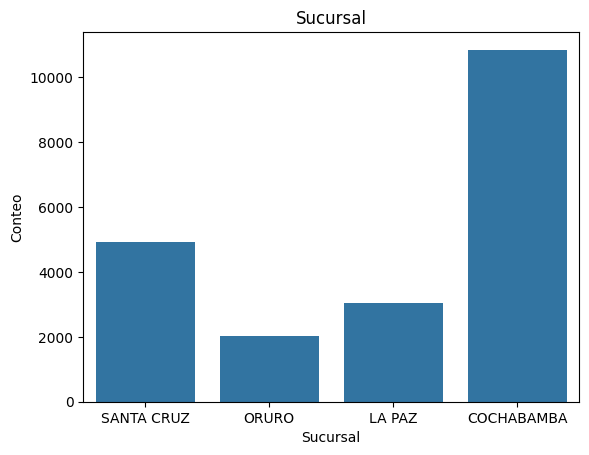

In [ ]:
# Crear gráfico de conteo
sns.countplot(x='Sucursal', data=df_data)
plt.title('Sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Conteo')
plt.show()

In [ ]:
#graficos_eda_categoricos(df_data.select_dtypes('O'))

In [ ]:
# Subniveles de cada variable categórica
cols_cat = ['Descripcion','Sucursal', 'Vendedor', 'Cliente', 'Marca',
       'Proveedor']

for col in cols_cat:
  print(f'Columna {col}: {df_data[col].nunique()} subniveles')

Columna Descripcion: 3390 subniveles
Columna Sucursal: 4 subniveles
Columna Vendedor: 115 subniveles
Columna Cliente: 8284 subniveles
Columna Marca: 120 subniveles
Columna Proveedor: 44 subniveles


In [ ]:
#Como se comportan de variables categoricas
df_data.describe(include=['O'])

,IdProd,Descripcion,Sucursal,Vendedor,Cliente,FechaCierre,Marca,Proveedor
count,20838,20838,20838,20838,20838,20736,20838,20838
unique,3298,3390,4,115,8284,453,120,44
top,00012196.4,MASCARA DE SOLDA AUTO.C/ CONTROLADOR LYNUS MSL...,COCHABAMBA,Tienda Cochabamba,CLIENTE,2022-09-21,TRUPER,FORZA SRL
freq,411,401,10842,9644,790,1499,4158,5407


#### EDA VARIABLES NUMÉRICAS

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
estadisticos_cont(df_data.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
ID,20838.0,7898.483636,7893.00,5204.512661,1.00,2708.25,7893.00,11799.0,24028.0
Cantidad,20838.0,1.353297,1.00,2.067014,1.00,1.00,1.00,1.0,100.0
PrecioCompra,20838.0,380.458355,99.08,691.990847,1.00,23.25,99.08,436.6,12043.0
PrecioVenta,20838.0,482.755769,135.00,861.172376,1.04,32.00,135.00,560.0,14500.0
PrecioFinal,20838.0,484.188019,130.00,862.646920,2.00,32.00,130.00,560.0,14500.0
ComisionUnit,20838.0,16.900860,0.00,59.551017,-750.00,0.00,0.00,21.0,4681.0
ComisionTotal,20838.0,18.170190,0.00,70.048407,-750.00,0.00,0.00,25.0,4681.0
Total,20838.0,531.496194,166.50,996.225934,2.00,36.00,166.50,630.0,38500.0
Utilidad,20838.0,93.900944,37.25,277.979480,-15067.20,9.50,37.25,102.0,7294.0


# SELECCION DE VARIABLES

In [ ]:
# Eliminar variables sin relevancia
df_data = df_data.drop(columns=['ID','FechaCierre','IdProd'])

               Cantidad  PrecioVenta  Utilidad  ComisionTotal
Cantidad       1.000000    -0.068465 -0.067203       0.124505
PrecioVenta   -0.068465     1.000000  0.553564       0.383288
Utilidad      -0.067203     0.553564  1.000000      -0.057602
ComisionTotal  0.124505     0.383288 -0.057602       1.000000


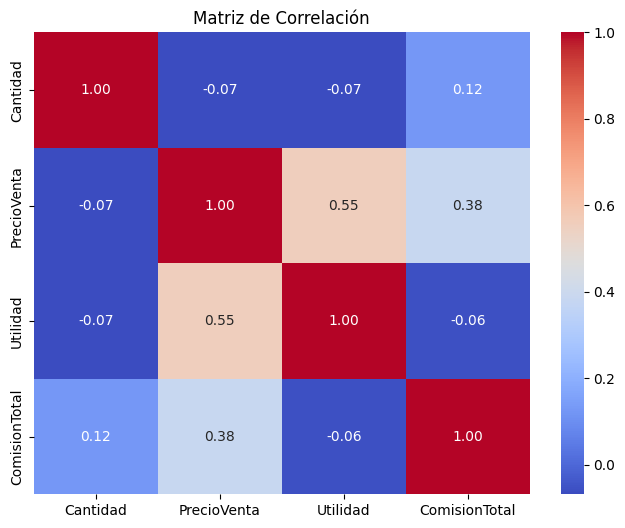

In [ ]:

# Seleccionar solo las columnas numéricas que deseas incluir en la matriz de correlación
columnas_seleccionadas = df_data[['Cantidad', 'PrecioVenta', 'Utilidad', 'ComisionTotal']]

# Calcular la matriz de correlación
correlation_matrix = columnas_seleccionadas.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Agrupar por 'marca' y sumar las 'ventas'
ventas_por_marca = df_data.groupby('Descripcion', as_index=False)['Total'].sum()

# Ordenar por 'ventas' de forma descendente
ventas_por_marca = ventas_por_marca.sort_values(by='Total', ascending=False)

# Seleccionar las 20 marcas más vendidas
df_top_marcas = ventas_por_marca.head(20)

# Mostrar el resultado
print(df_top_marcas)

                                            Descripcion      Total
2214  LPA-1000 MÁQUINA DE PINTURA SIN AIRE LYNUS 100...  342070.00
2215  LPA-650 MAQUINA DE PINTURA AIRLESS LYNUS 650W ...  254222.00
1240                EMPHILADERIA MANUAL 2000 KG EL-2000  238946.00
3275                    TC-TS 2025/2 U, SIERRA DE BANCO  228410.00
1241  EMPILHADEIRA MANUAL 1T X 1.6M - 550 X 900MM EM...  224687.00
2681  POWER INVERSORA DE SOLDA LYNUS MIG BIVOLT 140A...  216172.00
2679  POWER INVERSOR DE SOLDA LYNUS MIG 200A 220V LI...  188519.00
2655      PLAINA DESENGROSSADEIRA LYNUS 8" 220V PDL-800  185250.00
1672    INVERSOR DE SOLDA ALUMINIO POWER 220V LIS-250AL  183870.00
2513           PALETEIRA 3000 KG L.HASTE 685MM PM-685.3  174790.62
2653    PLAINA DESENGROSSADEIRA LYNUS 13" 220V PDL-1300  155390.00
2512             PALETEIRA 2000 KG L.HASTE 685MM PM-685  155000.00
2334  MASCARA DE SOLDA AUTO.C/ CONTROLADOR LYNUS MSL...  139594.00
3001             SIERRA DE MESA STANLEY DISCO 10" 1800W  12857

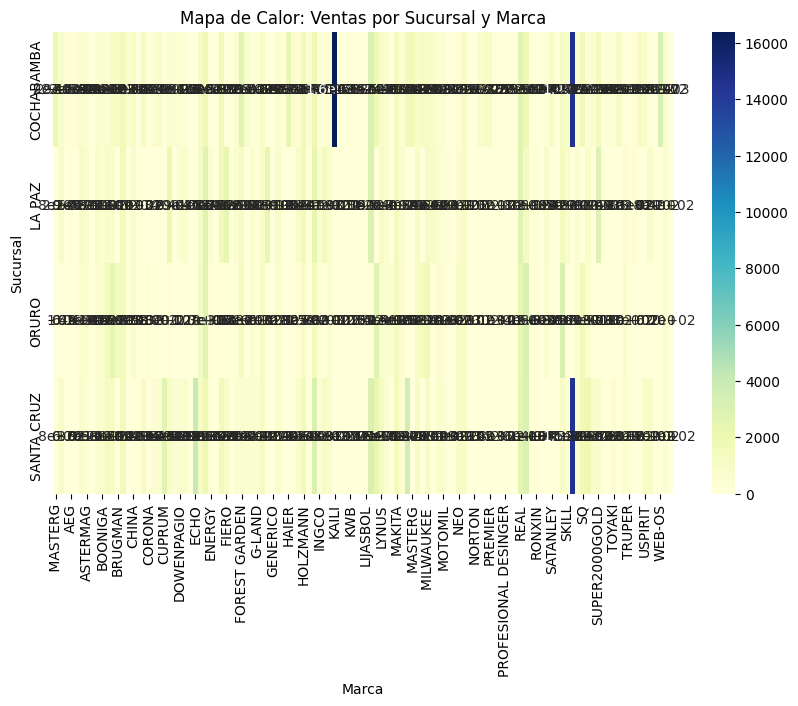

In [ ]:
df = pd.DataFrame(df_data)

# Crear una tabla de contingencia
contingency_table = df.pivot_table(values='Total', index='Sucursal', columns='Marca', fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Mapa de Calor: Ventas por Sucursal y Marca')
plt.xlabel('Marca')
plt.ylabel('Sucursal')
plt.show()

In [ ]:
# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(df_data['Proveedor'], df_data['Sucursal'])

# Visualizar la tabla
print(tabla_contingencia)

Sucursal                                   COCHABAMBA  LA PAZ  ORURO  \
Proveedor                                                              
ABDIAS PATICK                                       7       0      0   
ABELCO IMPORTADORA MAYORISTA                        3       0      0   
BAUMANN SRL                                       332     186     67   
BLEICHNER INDUSTRIA Y COMERCIO  S.A.               10       0      0   
CABEZAS IMPORTACIONES Y REPRESENTACIONES          922     266    146   
CARLOS SALAZAR                                     20       0      0   
COBAR LUBRICANTES                                  11       0      0   
COMERCIAL FAMA                                    198      41     58   
COMERCIAL VOCAL                                    57      23     17   
COMPANEX                                            3       0      0   
CORONA                                              0       0      1   
CRISANT SRL                                         5       0   

# DETECCION DE ANOMALIAS



### Outliers en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

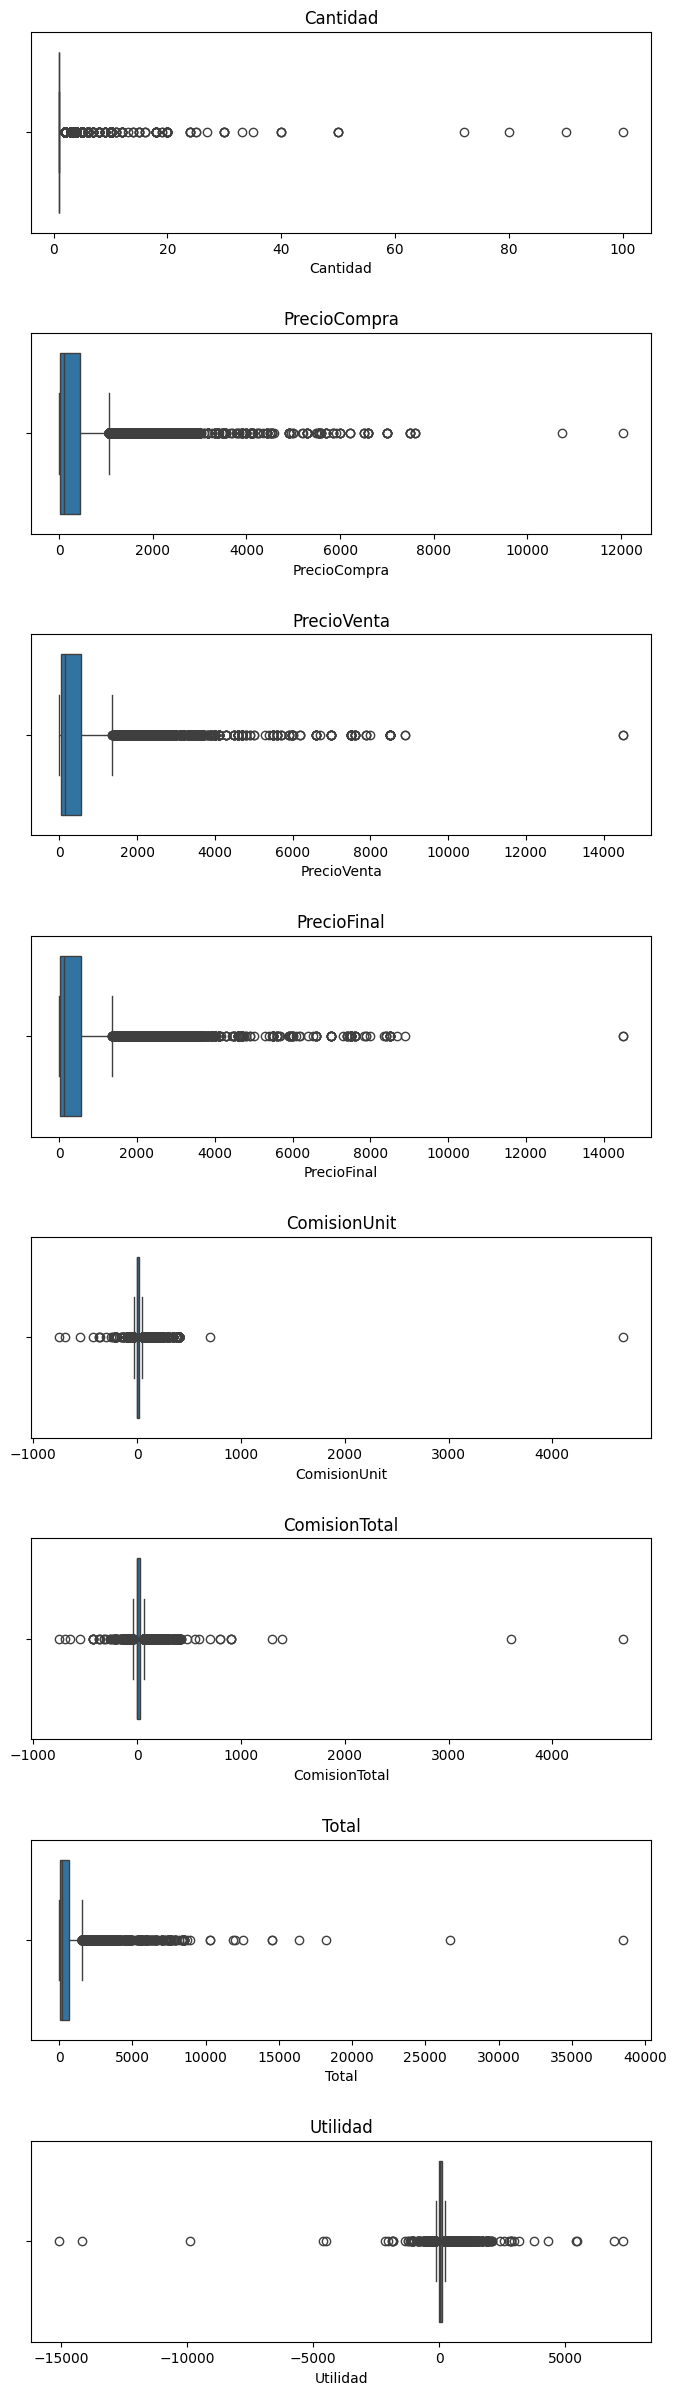

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['Cantidad','PrecioCompra', 'PrecioVenta', 'PrecioFinal', 'ComisionUnit',
            'ComisionTotal', 'Total','Utilidad']

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_data, ax=ax[i])
    ax[i].set_title(col)

In [ ]:
# Eliminación de outliers
df = df_data

#función para eliminar outliers
def remove_outliers_iqr(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calcular límites inferior y superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar los outliers
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

    return dataframe

# Especificar las columnas a limpiar
columnas_a_limpiar = ['Cantidad','Total', 'Utilidad','PrecioVenta','ComisionTotal']

# Limpiar el DataFrame
df_sin_outliers = remove_outliers_iqr(df, columnas_a_limpiar)

print(f"Nueva forma del DataFrame: {df_sin_outliers.shape}")

Nueva forma del DataFrame: (12355, 15)


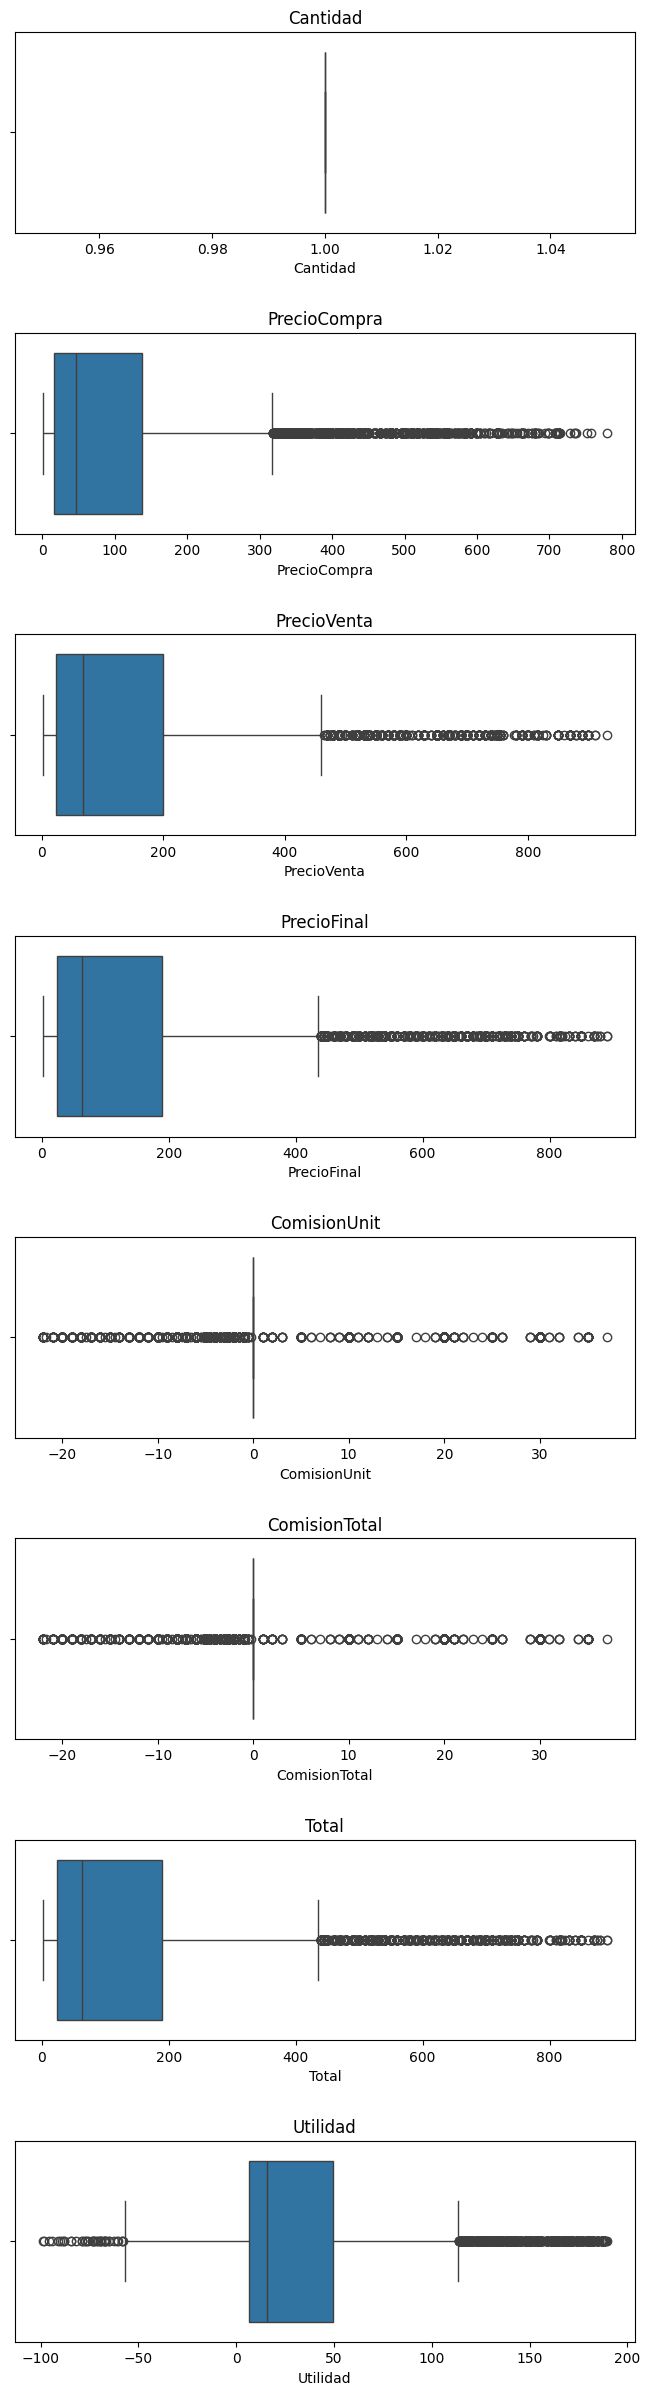

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['Cantidad', 'PrecioCompra', 'PrecioVenta', 'PrecioFinal', 'ComisionUnit',
            'ComisionTotal', 'Total','Utilidad']

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_sin_outliers, ax=ax[i])
    ax[i].set_title(col)

# MACHINE LEARNING

### Preparacion del Modelo ML

In [ ]:
#Copia del dataset para las tecnicas de Machine Leraning
df_ml = df_sin_outliers.copy()

In [ ]:
percentiles = df_ml['Utilidad'].quantile([0.25, 0.5, 0.75])
print(percentiles)

0.25     6.6
0.50    15.5
0.75    49.4
Name: Utilidad, dtype: float64


In [ ]:
# Definir los límites de los intervalos y las etiquetas
bins = [-float('inf'), 6.50, 30, float('inf')]
labels = ['bajo', 'medio', 'alto']

# Crear la columna de datos discretos
df_ml['Nivel_ventas'] = pd.cut(df_ml['Utilidad'], bins=bins, labels=labels)

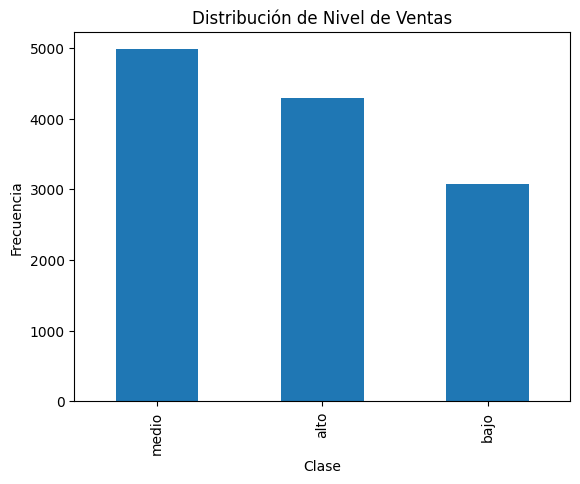

In [ ]:
df_ml['Nivel_ventas'].value_counts().plot(kind='bar')
plt.title("Distribución de Nivel de Ventas")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

### RandomForest Modelo ML

In [ ]:
# usando Modelo randomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

# Convertir 'Marca' a variable categórica
df_ml['Marca'] = pd.Categorical(df_ml['Marca'])

# Preparar los datos
# Dividir datos en entrenamiento y prueba
X = df_ml[['Marca','Sucursal', 'PrecioVenta']]
y = df_ml['Nivel_ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir la columna 'Marca' a variables dummy (codificación one-hot)
# Crear variables dummy para la columna 'Marca' en X_train
dummies_train = pd.get_dummies(X_train['Marca'], drop_first=True)
X_train = pd.concat([X_train.drop('Marca', axis=1), dummies_train], axis=1)

# Crear variables dummy para la columna 'Sucursal' en X_train
dummies_train = pd.get_dummies(X_train['Sucursal'], drop_first=True)
X_train = pd.concat([X_train.drop('Sucursal', axis=1), dummies_train], axis=1)

# Crear variables dummy para la columna 'Marca' en X_test
dummies_test = pd.get_dummies(X_test['Marca'], drop_first=True)
X_test = pd.concat([X_test.drop('Marca', axis=1), dummies_test], axis=1)

# Crear variables dummy para la columna 'Sucursal' en X_test
dummies_test = pd.get_dummies(X_test['Sucursal'], drop_first=True)
X_test = pd.concat([X_test.drop('Sucursal', axis=1), dummies_test], axis=1)

# Asegurar que X_train y X_test tengan las mismas columnas
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


# Evaluar el modelo
y_pred = rf_model.predict(X_test)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular precisión
print("===== Calcular precisión ====")
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.2f}\n')

f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' para manejar clases desbalanceadas
print(f'F1-Score: {f1:.2f}\n')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=rf_model.classes_, columns=rf_model.classes_)
print("Matriz de Confusión:\n", cm_df)

Reporte de clasificación:
              precision    recall  f1-score   support

        alto       0.93      0.89      0.91       865
        bajo       0.90      0.83      0.86       614
       medio       0.83      0.90      0.87       992

    accuracy                           0.88      2471
   macro avg       0.89      0.88      0.88      2471
weighted avg       0.88      0.88      0.88      2471

===== Calcular precisión ====
accuracy: 0.88

F1-Score: 0.88

Matriz de Confusión:
        alto  bajo  medio
alto    773     6     86
bajo     10   509     95
medio    45    51    896


### LogisticRegression del Modelo ML

In [ ]:
#Usando modelo LogisticRegression
from sklearn.linear_model import LogisticRegression

# Convertir marca a variable categórica
#df_ml['Marca'] = pd.Categorical(df_ml['Marca'])

#Preparar datos

# Dividir datos en entrenamiento y prueba
X = df_ml[['Marca','PrecioVenta']]
y = df_ml['Nivel_ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir marca a variable numérica
# Crear variables dummy para la columna 'Marca' sin asignarla directamente a 'X_train['Marca']'
dummies = pd.get_dummies(X_train['Marca'], drop_first=True)

# Concatenar las variables dummy con el DataFrame original y eliminar la columna original 'Marca'
X_train = pd.concat([X_train.drop('Marca', axis=1), dummies], axis=1)

# Generar variables dummy para la columna 'Marca' en X_test
dummies_test = pd.get_dummies(X_test['Marca'], drop_first=True)

# Concatenar las variables dummy con el DataFrame original X_test y eliminar la columna 'Marca'
X_test = pd.concat([X_test.drop('Marca', axis=1), dummies_test], axis=1)


#Entrenar modelo

# Entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

#Evaluar modelo

# Predecir resultados
y_pred = model.predict(X_test)

# Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}\n')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score: {f1:.2f}\n')

# Evaluar clasificación
print(classification_report(y_test, y_pred))

# Evaluar Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
print("Matriz de Confusión:\n", cm_df)

#Interpretar resultados

# Coeficientes del modelo
#print(model.coef_)

# Intercept del modelo
print("Intercept:")
print(model.intercept_)

Precisión: 0.85

F1-Score: 0.85

              precision    recall  f1-score   support

        alto       0.96      0.83      0.89       865
        bajo       0.82      0.84      0.83       614
       medio       0.78      0.86      0.82       992

    accuracy                           0.85      2471
   macro avg       0.85      0.84      0.85      2471
weighted avg       0.85      0.85      0.85      2471

Matriz de Confusión:
        alto  bajo  medio
alto    715     0    150
bajo      5   517     92
medio    26   110    856
Intercept:
[-3.00695631  2.33559868  0.67135762]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### resultados

In [ ]:
# Importancia de las características
print("Importancia de características:")
feature_importances = pd.DataFrame({'Característica': X_t.columns,
                                    'Importancia': rf_model.feature_importances_})
print(feature_importances.sort_values(by='Importancia', ascending=False))

In [ ]:
#Exportar datos procesados para la fase de Visualizaciones.
from google.colab import files

df_sin_outliers.to_excel('VentasRangoLimpio.xlsx')
files.download('VentasRangoLimpio.xlsx')

ValueError: x and y must have same first dimension, but have shapes (55,) and (9884, 95)

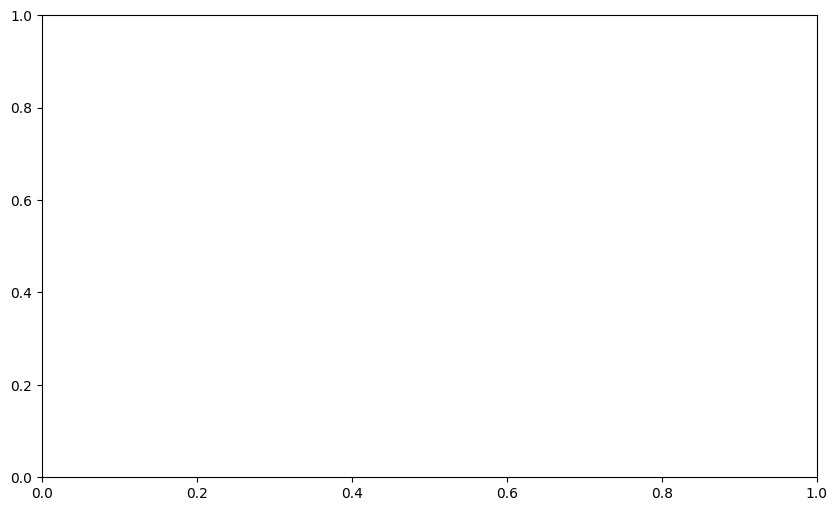

In [ ]:
# usando Modelo randomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

# Convertir 'Marca' a variable categórica
df_ml['Marca'] = pd.Categorical(df_ml['Marca'])

# Preparar los datos
# Dividir datos en entrenamiento y prueba
X = df_ml[['Marca','Sucursal', 'PrecioVenta']]
y = df_ml['Nivel_ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir la columna 'Marca' a variables dummy (codificación one-hot)
# Crear variables dummy para la columna 'Marca' en X_train
dummies_train = pd.get_dummies(X_train['Marca'], drop_first=True)
X_train = pd.concat([X_train.drop('Marca', axis=1), dummies_train], axis=1)

# Crear variables dummy para la columna 'Sucursal' en X_train
dummies_train = pd.get_dummies(X_train['Sucursal'], drop_first=True)
X_train = pd.concat([X_train.drop('Sucursal', axis=1), dummies_train], axis=1)

# Crear variables dummy para la columna 'Marca' en X_test
dummies_test = pd.get_dummies(X_test['Marca'], drop_first=True)
X_test = pd.concat([X_test.drop('Marca', axis=1), dummies_test], axis=1)

# Crear variables dummy para la columna 'Sucursal' en X_test
dummies_test = pd.get_dummies(X_test['Sucursal'], drop_first=True)
X_test = pd.concat([X_test.drop('Sucursal', axis=1), dummies_test], axis=1)

# Asegurar que X_train y X_test tengan las mismas columnas
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Entrenar el modelo de Random Forest
#rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
#rf_model.fit(X_train, y_train)


# Listas para almacenar resultados
train_accuracies = []
test_accuracies = []

# Entrenar el modelo y recoger las precisiones
for n_estimators in range(1, 101):
    rf_model = RandomForestClassifier(random_state=42, n_estimators=n_estimators)
    rf_model.fit(X_train, y_train)

    train_pred = rf_model.predict(X_train)
    test_pred = rf_model.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Graficar las precisiones
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_accuracies, label='Precisión de Entrenamiento', color='blue')
plt.plot(range(1, 101), test_accuracies, label='Precisión de Prueba', color='orange')
plt.title('Precisión del Modelo Random Forest')
plt.xlabel('Número de Árboles (n_estimators)')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Precisión de Entrenamiento: 0.8889113719142048
Precisión de Prueba: 0.8891137191420477
              precision    recall  f1-score   support

        alto       0.94      0.91      0.92       865
        bajo       0.92      0.82      0.87       614
       medio       0.83      0.92      0.87       992

    accuracy                           0.89      2471
   macro avg       0.90      0.88      0.89      2471
weighted avg       0.89      0.89      0.89      2471



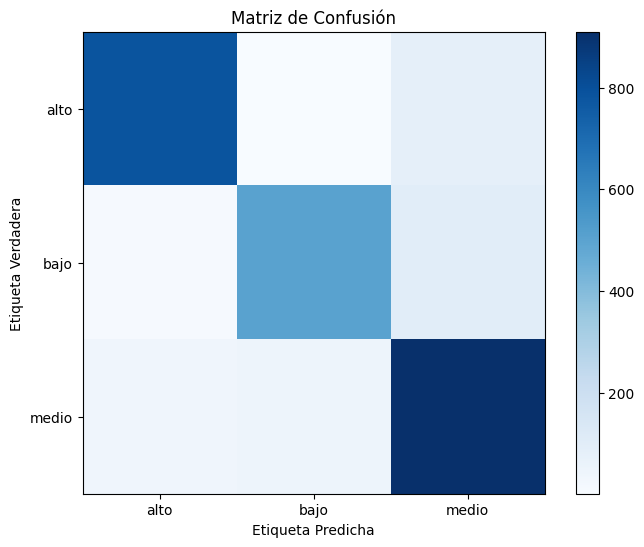

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Convertir 'Marca' a variable categórica
df_ml['Marca'] = pd.Categorical(df_ml['Marca'])

# Preparar los datos
X = df_ml[['Marca', 'Sucursal', 'PrecioVenta']]
y = df_ml['Nivel_ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir la columna 'Marca' y 'Sucursal' a variables dummy
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurar que X_train y X_test tengan las mismas columnas
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Definir el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Definir los parámetros para la búsqueda
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Realizar predicciones y evaluar
train_pred = best_rf_model.predict(X_train)
test_pred = best_rf_model.predict(X_test)

print("Precisión de Entrenamiento:", accuracy_score(y_train, train_pred))
print("Precisión de Prueba:", accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

# Graficar la matriz de confusión
conf_matrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

### REvisar

In [ ]:
# Agrupar por cliente y calcular las métricas
client_data = df_ml.groupby('Cliente').agg(
    total_gastado=('Total', 'sum'),
    frecuencia_compras=('Total', 'count'),
    promedio_gastado=('Total', 'mean')
).reset_index()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar las características seleccionadas
scaler = StandardScaler()
client_data[['total_gastado', 'frecuencia_compras', 'promedio_gastado']] = scaler.fit_transform(
    client_data[['total_gastado', 'frecuencia_compras', 'promedio_gastado']]
)

In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters (puedes experimentar con este valor)
n_clusters = 5  # Por ejemplo, 2 grupos: mejores y peores clientes

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
client_data['cluster'] = kmeans.fit_predict(client_data[['total_gastado', 'frecuencia_compras', 'promedio_gastado']])

In [ ]:
# Ver la distribución de clientes en cada grupo
print(client_data.groupby('cluster').agg({
    'Cliente': 'count',
    'total_gastado': 'mean',
    'frecuencia_compras': 'mean',
    'promedio_gastado': 'mean'
}))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sin_outliers, x='frecuencia_compras', y='total_gastado', hue='cluster', palette='viridis')
plt.title('Agrupación de Clientes')
plt.xlabel('Frecuencia de Compras')
plt.ylabel('Total Gastado')
plt.show()